# USA potential medalists: jordan chiles
## # k-folds cv

['jessica gadirova', 'jordan chiles']

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from mlxtend.preprocessing import minmax_scaling
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, fbeta_score
from sklearn.metrics import confusion_matrix
from sklearn.dummy import DummyClassifier
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('../../Combine_Data/women/iaa_encoded.csv')
iaaolymp = pd.read_csv('../../Combine_Data/women/iaa2024.csv')
olymp = pd.read_csv('../../Combine_Data/women/encoded_w_olympics_iaa.csv')
iaanames = pd.read_csv('../../Combine_Data/women/encoded_w_olympics_iaanames.csv')

# clean df and olymp

In [4]:
df.replace('DNS', 0, inplace=True)


In [5]:
columns_to_convert = ['VT', 'UB', 'BB', 'FX']
df[columns_to_convert] = df[columns_to_convert].astype(float)

In [6]:
new_order = ['Name', 'Nation', 'Rank', 'VT', 'UB', 'BB', 'FX', 'AA', 'year', 'medal', 
       'round_final', 'round_qual']

# Rearrange the columns
df = df[new_order]

In [7]:
new_order = ['Name', 'Nation', 'Rank', 'VT', 'UB', 'BB', 'FX', 'AA', 'year', 
       'round_final', 'round_qual']

olymp = olymp[new_order]

In [8]:
y = df['medal']
X = df.drop(columns=['medal'])

# Base line using ZeroR

In [9]:

X = df.drop(columns=['medal'])  
y = df['medal']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=90)

# Initialize the ZeroR classifier
zero_r_clf = DummyClassifier(strategy='most_frequent', random_state=42)

zero_r_clf.fit(X_train, y_train)

# Make predictions test data
y_pred = zero_r_clf.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("ZeroR Classifier")
print(f"Accuracy: {accuracy:.4f}")
print(f"Classification Report:\n{report}")
print(f"Confusion Matrix:\n{conf_matrix}")


ZeroR Classifier
Accuracy: 0.9831
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       175
           1       0.00      0.00      0.00         3

    accuracy                           0.98       178
   macro avg       0.49      0.50      0.50       178
weighted avg       0.97      0.98      0.97       178

Confusion Matrix:
[[175   0]
 [  3   0]]


# Model Comparison


In [10]:
y = df['medal']
X = df.drop(columns=['medal'])

# Split the data into training and testing sets
# CHANGED RANDOM STATE TO HAVE A LARGER NUMBER OF VALUES IN TEST DF
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.31, random_state=90)

# Initialize classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "SVM": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
    "Neural Network": MLPClassifier(),
}

results = {}

# Iterate through each classifier
for name, clf in classifiers.items():
    # Create a pipeline with StandardScaler for classifiers that require it
    if name in ["SVM", "K-Nearest Neighbors", "Neural Network"]:
        clf = make_pipeline(StandardScaler(), clf)

    # Fit the model to the training data
    clf.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = clf.predict(X_test)

    # Evaluate the model's performance
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    beta = 2
    f2_score = fbeta_score(y_test, y_pred, beta=beta)

    results[name] = {
        "accuracy": accuracy,
        "classification_report": report,
        "confusion_matrix": conf_matrix,
        "f2_score": f2_score,
    }
    
# Print the results
for name, result in results.items():
    print(f"Classifier: {name}")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print(f"F2-Score: {result['f2_score']:.4f}")
    print(f"Classification Report:\n{result['classification_report']}")
    print(f"Confusion Matrix:\n{result['confusion_matrix']}\n")


Classifier: Random Forest
Accuracy: 0.9820
F2-Score: 0.0000
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       164
           1       0.00      0.00      0.00         3

    accuracy                           0.98       167
   macro avg       0.49      0.50      0.50       167
weighted avg       0.96      0.98      0.97       167

Confusion Matrix:
[[164   0]
 [  3   0]]

Classifier: AdaBoost
Accuracy: 0.9880
F2-Score: 0.3846
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       164
           1       1.00      0.33      0.50         3

    accuracy                           0.99       167
   macro avg       0.99      0.67      0.75       167
weighted avg       0.99      0.99      0.99       167

Confusion Matrix:
[[164   0]
 [  2   1]]

Classifier: SVM
Accuracy: 0.9820
F2-Score: 0.0000
Classification Report:
              precision    r

# Feature Importance - no diff

Feature Importances:
Name: 0.0000
Nation: 0.2857
Rank: 0.0000
VT: 0.2857
UB: 0.1429
BB: 0.0000
FX: 0.1429
AA: 0.1429
year: 0.0000
round_final: 0.0000
round_qual: 0.0000


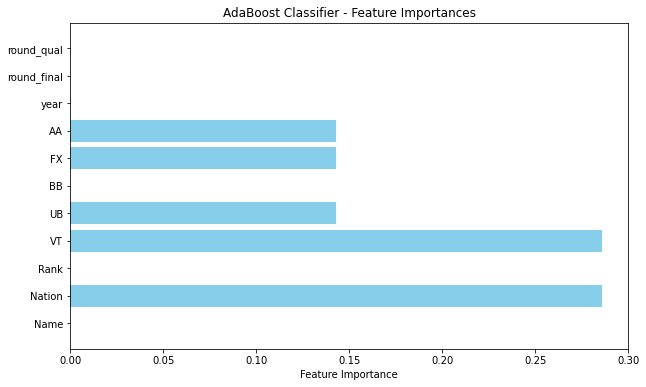

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier

y = df['medal']
X = df.drop(columns=['medal'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=90)

# Initialize the AdaBoost classifier
clf = AdaBoostClassifier( n_estimators=7)

# Fit the model to the training data
clf.fit(X_train, y_train)

# Extract feature importances
feature_importances = clf.feature_importances_

# Print feature importances
print("Feature Importances:")
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance:.4f}")

    

# Assuming you have X_train, X_test, y_train, y_test already defined and clf is trained

# Extract feature importances
feature_importances = clf.feature_importances_

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('AdaBoost Classifier - Feature Importances')
plt.show()

In [12]:
feats = df.drop(columns=['round_final', 'round_qual'],)

# k-folds cv

In [13]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming 'feats' is your DataFrame
df = feats.copy()

y = df['medal']
X = df.drop(columns=['medal'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=90)

# Initialize the AdaBoost classifier
# CHANGING LEARNIN RATE TO 0.31 RESULTS IN 1.000 
clf = AdaBoostClassifier(n_estimators=7)

# Initialize StratifiedKFold for k-fold cross-validation
k_folds = 5
stratified_kfold = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# Initialize variables to store results
accuracies = []

# Iterate over folds for evaluation
for fold, (train_index, test_index) in enumerate(stratified_kfold.split(X_train, y_train)):
    print(f"\nFold {fold + 1}")

    # Split the data into training and testing sets for this fold
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    # Train the model for this fold
    clf.fit(X_train_fold, y_train_fold)

    # Make predictions on the validation data for this fold
    y_pred = clf.predict(X_val_fold)

    # Evaluate the model's performance for this fold
    accuracy = accuracy_score(y_val_fold, y_pred)
    accuracies.append(accuracy)

    print(f"Accuracy: {accuracy:.4f}")

# Calculate and print the average accuracy across folds
average_accuracy = sum(accuracies) / k_folds
print(f"\nAverage Accuracy across Folds: {average_accuracy:.4f}")

# Optionally, you can use the entire dataset to train the final model
# clf.fit(X, y)

# Make predictions on the entire dataset
y_pred = clf.predict(X)

# Evaluate the model's performance on the entire dataset
accuracy = accuracy_score(y, y_pred)
report = classification_report(y, y_pred)
conf_matrix = confusion_matrix(y, y_pred)

# Print the results for the entire dataset
print("\nAdaBoost Classifier")
print(f"Accuracy: {accuracy:.4f}")
print(f"Classification Report:\n{report}")
print(f"Confusion Matrix:\n{conf_matrix}")



Fold 1
Accuracy: 0.9583

Fold 2
Accuracy: 0.9861

Fold 3
Accuracy: 0.9861

Fold 4
Accuracy: 0.9861

Fold 5
Accuracy: 0.9718

Average Accuracy across Folds: 0.9777

AdaBoost Classifier
Accuracy: 0.9907
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       529
           1       0.67      0.75      0.71         8

    accuracy                           0.99       537
   macro avg       0.83      0.87      0.85       537
weighted avg       0.99      0.99      0.99       537

Confusion Matrix:
[[526   3]
 [  2   6]]


In [13]:
df = feats.copy()

y = df['medal']
X = df.drop(columns=['medal'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=90)

# Initialize the AdaBoost classifier
# CHANGING LEARNIN RATE TO 0.31 RESULTS IN 1.000 
clf = AdaBoostClassifier( n_estimators=7)

# Fit the model to the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print("AdaBoost Classifier")
print(f"Accuracy: {accuracy:.4f}")
print(f"Classification Report:\n{report}")
print(f"Confusion Matrix:\n{conf_matrix}")

AdaBoost Classifier
Accuracy: 0.9944
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       175
           1       1.00      0.67      0.80         3

    accuracy                           0.99       178
   macro avg       1.00      0.83      0.90       178
weighted avg       0.99      0.99      0.99       178

Confusion Matrix:
[[175   0]
 [  1   2]]


# Final Model

In [14]:
df = pd.read_csv('../../Combine_Data/women/iaa_encoded.csv')
df.replace('DNS', 0, inplace=True)
columns_to_convert = ['VT', 'UB', 'BB', 'FX']
df[columns_to_convert] = df[columns_to_convert].astype(float)

In [15]:
new_order = ['Name', 'Nation', 'Rank', 'VT', 'UB', 'BB', 'FX', 'AA', 'year', 'medal', 
       'round_final', 'round_qual']

# Rearrange the columns
df = df[new_order]

In [16]:
y = df['medal']
X = df.drop(columns=['medal'])

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=90)


In [18]:
# Initialize the AdaBoost classifier
# CHANGING LEARNIN RATE TO 0.31 RESULTS IN 1.000 
clf = AdaBoostClassifier( n_estimators=7)

# Fit the model to the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print("AdaBoost Classifier")
print(f"Accuracy: {accuracy:.4f}")
print(f"Classification Report:\n{report}")
print(f"Confusion Matrix:\n{conf_matrix}")

AdaBoost Classifier
Accuracy: 0.9944
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       175
           1       1.00      0.67      0.80         3

    accuracy                           0.99       178
   macro avg       1.00      0.83      0.90       178
weighted avg       0.99      0.99      0.99       178

Confusion Matrix:
[[175   0]
 [  1   2]]


In [19]:
y_pred = clf.predict(olymp)


In [20]:
ypreds  = pd.Series(y_pred)
olymp['ypred']=ypreds
olymp['ypred'].value_counts()

ypred
0    817
1      4
Name: count, dtype: int64

In [21]:
filtered_df = olymp[olymp['ypred'] == 1]
filtered_df['Name'].unique()

array([170, 173])

# iaanames used to match encoded names with actual names

In [22]:
name_encoded_values = [170, 173]

# Filter the DataFrame to get the corresponding "Name" values
result = iaanames.loc[iaanames['Name_encoded'].isin(name_encoded_values), 'Athlete']
result.unique() 

array(['jessica gadirova', 'jordan chiles'], dtype=object)

# iaaolymp used to get country info from name list above

In [23]:
iaaolymp["Athlete"]=iaaolymp["Athlete"].str.lower()

In [24]:
names_to_filter =['jessica gadirova', 'jordan chiles']

# Filter the DataFrame to get rows with the specified values
result = iaaolymp[iaaolymp['Athlete'].isin(names_to_filter)]


In [25]:
result['Nation'].value_counts()

Nation
none    4
USA     2
Name: count, dtype: int64

In [26]:
usa = result[result['Nation']=='USA']

In [27]:
usa['Athlete'].value_counts()

Athlete
jordan chiles    2
Name: count, dtype: int64